In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import numpy as np

# processing imports
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [33]:
columns=(['Destination_Port',
'Flow_Duration',
'Total_Fwd_Packets',
'Total_Backward_Packets',
'Total_Length_of_Fwd_Packets',
'Total_Length_of_Bwd_Packets',
'Fwd_Packet_Length_Max',
'Fwd_Packet_Length_Min',
'Fwd_Packet_Length_Mean',
'Fwd_Packet_Length_Std',
'Bwd_Packet_Length_Max',
'Bwd_Packet_Length_Min',
'Bwd_Packet_Length_Mean',
'Bwd_Packet_Length_Std',
'Flow_Bytes',
'Flow_Packets',
'Flow_IAT_Mean',
'Flow_IAT_Std',
'Flow_IAT_Max',
'Flow_IAT_Min',
'Fwd_IAT_Total',
'Fwd_IAT_Mean',
'Fwd_IAT_Std',
'Fwd_IAT_Max',
'Fwd_IAT_Min',
'Bwd_IAT_Total',
'Bwd_IAT_Mean',
'Bwd_IAT_Std',
'Bwd_IAT_Max',
'Bwd_IAT_Min',
'Fwd_PSH_Flags',
'Bwd_PSH_Flags',
'Fwd_URG_Flags',
'Bwd_URG_Flags',
'Fwd_Header_Length',
'Bwd_Header_Length',
'Fwd_Packets',
'Bwd_Packets',
'Min_Packet_Length',
'Max_Packet_Length',
'Packet_Length_Mean',
'Packet_Length_Std',
'Packet_Length_Variance',
'FIN-Flag_Count',
'SYN_Flag_Count',
'RST_Flag_Count',
'PSH_Flag_Count',
'ACK_Flag_Count',
'URG_Flag_Count',
'CWE_Flag_Count',
'ECE_Flag_Count',
'Down/Up_Ratio',
'Average_Packet_Size',
'Avg_Fwd_Segment_Size',
'Avg_Bwd_Segment_Size',
'Fwd_Hea_er_Length_1',
'Fwd_Avg-Bytes/Bulk',
'Fwd_Avg_Packets/Bulk',
'Fwd_Avg_Bulk Rate',
'Bwd_Avg_Bytes/Bulk',
'Bwd_Avg_Packets/Bulk',
'Bwd_Avg_Bulk_Rate',
'Subflow_Fwd_Packets',
'Subflow_Fwd_Bytes',
'Subflow_Bwd_Packets',
'Subflow_Bwd_Bytes',
'Init_Win_bytes_forward',
'Init_Win_bytes_backward',
'act_data_pkt_fwd',
'min_seg_size_forward',
'Active_Mean',
'Active_Std',
'Active_Max',
'Active_Min',
'Idle_Mean',
'Idle_Std',
'Idle_Max',
'Idle_Min',
'Label'])

In [3]:
df_train = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df_train.columns=columns

In [5]:
df_train.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df_train.shape

(225745, 79)

In [7]:
df_train.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes', 'Flow_Packets', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
       'Fwd_Packets', 'Bwd_Packets', 'Min_Packet_Length', 'Max_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN-Flag_Count', 'SYN_Flag_Count', 'RST_Flag

In [8]:
df_train.iloc[:,-1]

0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
225740    BENIGN
225741    BENIGN
225742    BENIGN
225743    BENIGN
225744    BENIGN
Name: Label, Length: 225745, dtype: object

In [9]:
df_train['Label'].value_counts()

DDoS      128027
BENIGN     97718
Name: Label, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

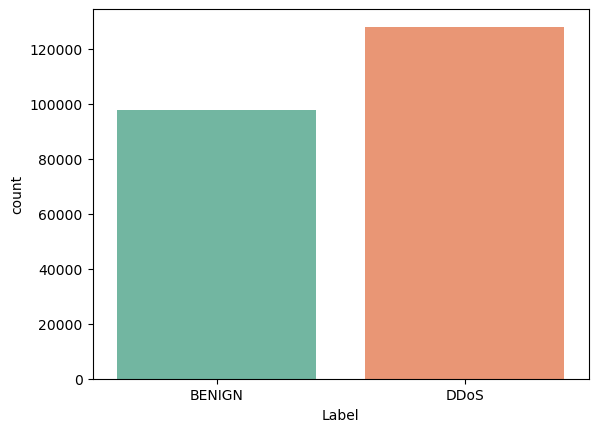

In [10]:
sns.countplot(df_train['Label'] , palette = 'Set2')

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination_Port             225745 non-null  int64  
 1   Flow_Duration                225745 non-null  int64  
 2   Total_Fwd_Packets            225745 non-null  int64  
 3   Total_Backward_Packets       225745 non-null  int64  
 4   Total_Length_of_Fwd_Packets  225745 non-null  int64  
 5   Total_Length_of_Bwd_Packets  225745 non-null  int64  
 6   Fwd_Packet_Length_Max        225745 non-null  int64  
 7   Fwd_Packet_Length_Min        225745 non-null  int64  
 8   Fwd_Packet_Length_Mean       225745 non-null  float64
 9   Fwd_Packet_Length_Std        225745 non-null  float64
 10  Bwd_Packet_Length_Max        225745 non-null  int64  
 11  Bwd_Packet_Length_Min        225745 non-null  int64  
 12  Bwd_Packet_Length_Mean       225745 non-null  float64
 13 

In [12]:
df_train.isna().sum().any()

True

In [13]:
df_train.iloc[:,0:40].isna().sum()

Destination_Port               0
Flow_Duration                  0
Total_Fwd_Packets              0
Total_Backward_Packets         0
Total_Length_of_Fwd_Packets    0
Total_Length_of_Bwd_Packets    0
Fwd_Packet_Length_Max          0
Fwd_Packet_Length_Min          0
Fwd_Packet_Length_Mean         0
Fwd_Packet_Length_Std          0
Bwd_Packet_Length_Max          0
Bwd_Packet_Length_Min          0
Bwd_Packet_Length_Mean         0
Bwd_Packet_Length_Std          0
Flow_Bytes                     4
Flow_Packets                   0
Flow_IAT_Mean                  0
Flow_IAT_Std                   0
Flow_IAT_Max                   0
Flow_IAT_Min                   0
Fwd_IAT_Total                  0
Fwd_IAT_Mean                   0
Fwd_IAT_Std                    0
Fwd_IAT_Max                    0
Fwd_IAT_Min                    0
Bwd_IAT_Total                  0
Bwd_IAT_Mean                   0
Bwd_IAT_Std                    0
Bwd_IAT_Max                    0
Bwd_IAT_Min                    0
Fwd_PSH_Fl

In [14]:
df_train.iloc[:,40:79].isna().sum()

Packet_Length_Mean         0
Packet_Length_Std          0
Packet_Length_Variance     0
FIN-Flag_Count             0
SYN_Flag_Count             0
RST_Flag_Count             0
PSH_Flag_Count             0
ACK_Flag_Count             0
URG_Flag_Count             0
CWE_Flag_Count             0
ECE_Flag_Count             0
Down/Up_Ratio              0
Average_Packet_Size        0
Avg_Fwd_Segment_Size       0
Avg_Bwd_Segment_Size       0
Fwd_Hea_er_Length_1        0
Fwd_Avg-Bytes/Bulk         0
Fwd_Avg_Packets/Bulk       0
Fwd_Avg_Bulk Rate          0
Bwd_Avg_Bytes/Bulk         0
Bwd_Avg_Packets/Bulk       0
Bwd_Avg_Bulk_Rate          0
Subflow_Fwd_Packets        0
Subflow_Fwd_Bytes          0
Subflow_Bwd_Packets        0
Subflow_Bwd_Bytes          0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
Active_Mean                0
Active_Std                 0
Active_Max                 0
Active_Min                 0
Idle_Mean     

In [15]:
df = df_train.fillna(0)

In [16]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
df.isna().sum().any()

False

In [18]:
corr = df.corr()
corr

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Destination_Port,1.000000,0.107038,-0.044270,0.008321,0.553843,-0.066648,0.604586,0.207158,0.658346,0.586255,...,-0.051366,-0.074278,0.061313,-0.026592,0.043156,0.066356,0.132272,0.110687,0.144428,0.095687
Flow_Duration,0.107038,1.000000,0.207660,0.145272,0.297832,0.088751,0.280808,-0.055700,0.257098,0.273820,...,0.194295,-0.112832,0.428397,0.148295,0.446759,0.413835,0.871855,0.630604,0.919199,0.672003
Total_Fwd_Packets,-0.044270,0.207660,1.000000,0.956714,0.174396,0.938470,0.041866,-0.038103,0.017458,0.030054,...,0.882270,-0.005388,0.135892,0.285131,0.223377,0.087692,0.110787,0.056807,0.109429,0.094747
Total_Backward_Packets,0.008321,0.145272,0.956714,1.000000,0.163495,0.970422,0.047501,-0.001468,0.032013,0.034200,...,0.865159,0.009922,0.099090,0.228430,0.164830,0.063551,0.065554,0.028627,0.062932,0.058056
Total_Length_of_Fwd_Packets,0.553843,0.297832,0.174396,0.163495,1.000000,0.067425,0.852427,0.004453,0.858439,0.839139,...,0.161399,-0.048262,0.185853,0.106051,0.203046,0.171280,0.261110,0.216771,0.284694,0.188569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active_Min,0.066356,0.413835,0.087692,0.063551,0.171280,0.046830,0.156816,-0.035780,0.148842,0.156675,...,0.082623,-0.055221,0.982673,-0.003429,0.868071,1.000000,0.602021,-0.058847,0.469089,0.690201
Idle_Mean,0.132272,0.871855,0.110787,0.065554,0.261110,0.042256,0.272060,-0.039715,0.262143,0.270210,...,0.114726,-0.139772,0.595859,0.022025,0.531538,0.602021,1.000000,0.420170,0.952585,0.910822
Idle_Std,0.110687,0.630604,0.056807,0.028627,0.216771,0.020081,0.230387,-0.048230,0.223047,0.232630,...,0.059977,-0.099363,-0.057820,-0.003866,-0.055222,-0.058847,0.420170,1.000000,0.676276,0.008218
Idle_Max,0.144428,0.919199,0.109429,0.062932,0.284694,0.041055,0.298035,-0.048410,0.287524,0.297282,...,0.113394,-0.146873,0.464725,0.017842,0.413812,0.469089,0.952585,0.676276,1.000000,0.742109


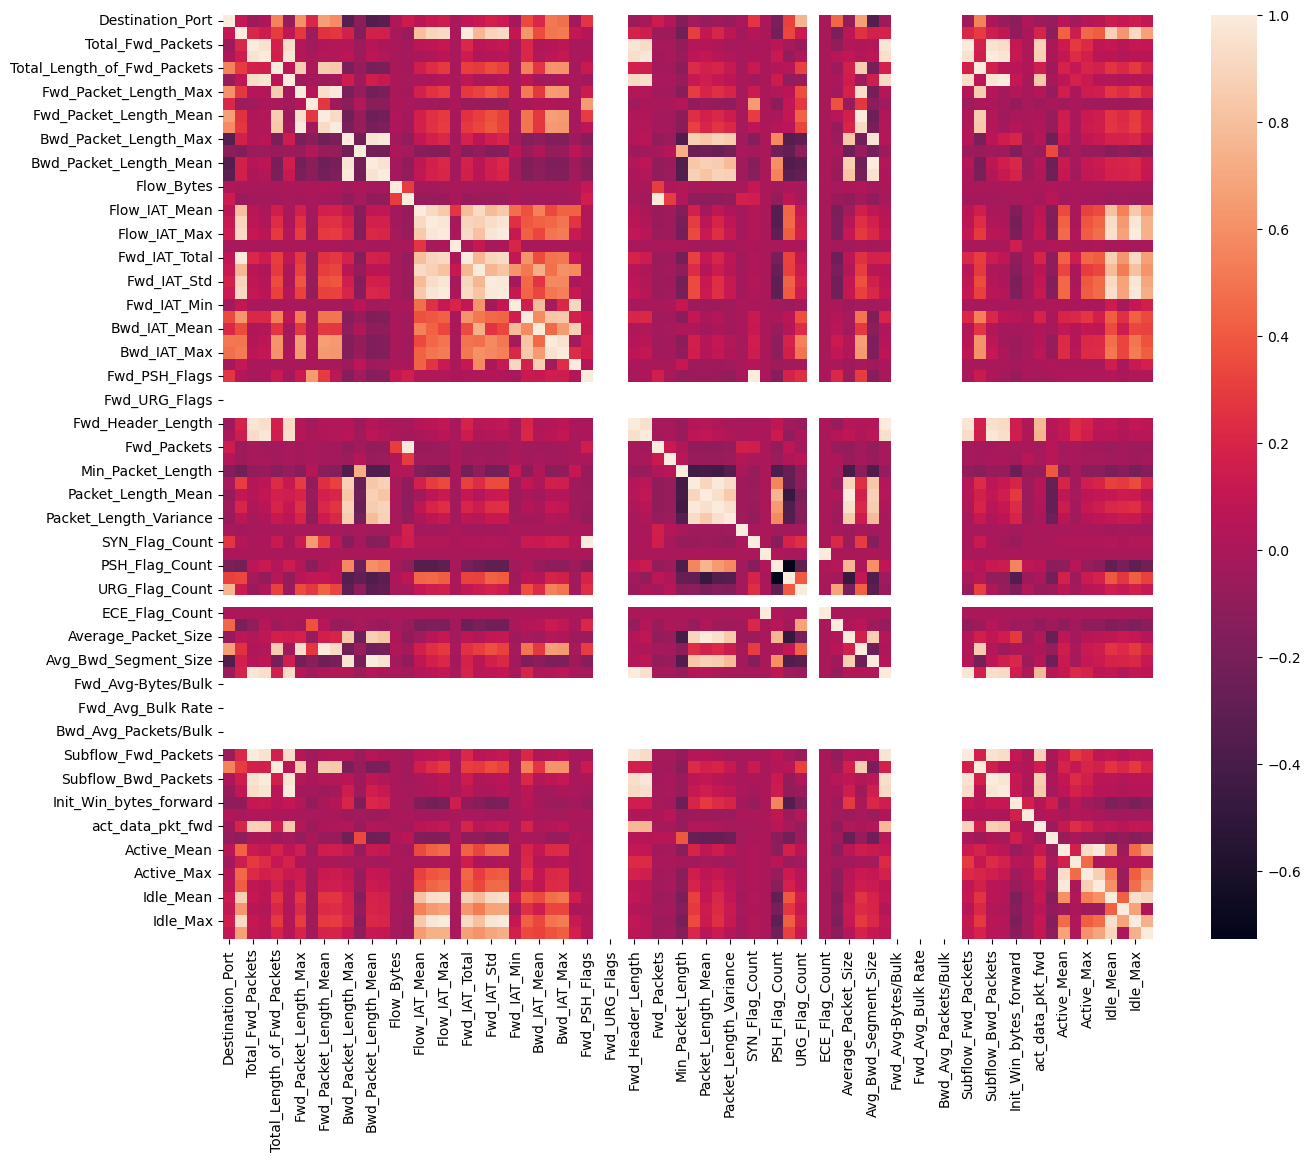

In [19]:
corr = df_train.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [20]:
df.drop('Fwd_URG_Flags',axis = 1,inplace=True)



In [21]:
df.shape

(225745, 78)

In [22]:
df.drop('Fwd_Avg-Bytes/Bulk',axis = 1,inplace = True)
df.drop('Bwd_Avg_Bulk_Rate',axis = 1,inplace = True)
df.drop('Bwd_Avg_Packets/Bulk',axis = 1,inplace = True)

In [23]:
df.shape

(225745, 75)

In [24]:

le=preprocessing.LabelEncoder()
df['Label']=le.fit_transform(df['Label'])
    

In [25]:
df['Label'].value_counts()

1    128027
0     97718
Name: Label, dtype: int64

In [26]:
# find out most important features

# label col
y = df.Label

# independant variable
x = df.drop(columns = ["Label"] ) 

# corelation y ~ X 
corr_X = x.corrwith(y)
cor=corr_X.sort_values(ascending=False)


In [27]:
cor[0:50]

Bwd_Packet_Length_Mean         0.603299
Avg_Bwd_Segment_Size           0.603299
Bwd_Packet_Length_Max          0.577323
Bwd_Packet_Length_Std          0.576155
Packet_Length_Mean             0.454283
Average_Packet_Size            0.453472
Packet_Length_Std              0.443749
Max_Packet_Length              0.414399
Packet_Length_Variance         0.408089
PSH_Flag_Count                 0.247740
Flow_IAT_Std                   0.129630
Flow_IAT_Mean                  0.127503
Fwd_IAT_Max                    0.105457
Flow_IAT_Max                   0.100654
Fwd_IAT_Std                    0.099651
ACK_Flag_Count                 0.096975
Idle_Max                       0.096775
Idle_Mean                      0.087114
Idle_Std                       0.078023
Idle_Min                       0.061243
Total_Length_of_Bwd_Packets    0.041244
Subflow_Bwd_Bytes              0.041244
Fwd_IAT_Total                  0.040565
Active_Min                     0.033821
Flow_Duration                  0.025923


In [28]:
cor[50:79]

Fwd_PSH_Flags                 -0.212189
Bwd_IAT_Std                   -0.290896
Bwd_IAT_Max                   -0.292054
Fwd_Packet_Length_Std         -0.300271
Down/Up_Ratio                 -0.305344
Bwd_IAT_Total                 -0.318679
Total_Length_of_Fwd_Packets   -0.319693
Subflow_Fwd_Bytes             -0.319693
Fwd_Packet_Length_Max         -0.321529
Avg_Fwd_Segment_Size          -0.356895
Fwd_Packet_Length_Mean        -0.356895
Bwd_Packet_Length_Min         -0.365667
min_seg_size_forward          -0.407315
Min_Packet_Length             -0.427396
URG_Flag_Count                -0.463190
Destination_Port              -0.509798
Flow_Bytes                          NaN
Flow_Packets                        NaN
Bwd_PSH_Flags                       NaN
Bwd_URG_Flags                       NaN
CWE_Flag_Count                      NaN
Fwd_Avg_Packets/Bulk                NaN
Fwd_Avg_Bulk Rate                   NaN
Bwd_Avg_Bytes/Bulk                  NaN
dtype: float64

In [29]:
x.drop('Flow_Bytes',axis = 1,inplace=True)
x.drop('Flow_Packets',axis = 1,inplace=True)
x.drop('Bwd_PSH_Flags',axis = 1,inplace=True)
x.drop('Bwd_URG_Flags',axis = 1,inplace=True)
x.drop('CWE_Flag_Count',axis = 1,inplace=True)
x.drop('Fwd_Avg_Packets/Bulk',axis = 1,inplace=True)
x.drop('Fwd_Avg_Bulk Rate',axis = 1,inplace=True)
x.drop('Bwd_Avg_Bytes/Bulk',axis = 1,inplace=True)

In [30]:
x.shape

(225745, 66)

# Normalisation

In [31]:
x = x.apply(lambda x:(x - x.min())/(x.max() - x.min() ), axis= 0 )

In [32]:
x.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,0.837225,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.840109,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.840124,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.705548,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.837194,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x.shape

(225745, 66)

In [34]:
x.isna().sum().any()

False

Train Test Split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Univariate Feature Selection

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 15 features
select_feature = SelectKBest(chi2, k=15).fit(x_train, y_train)

In [37]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [2.75466459e+04 5.68824402e+01 4.64982656e+00 2.68334473e+01
 9.94768075e+02 1.33807683e+01 9.02188013e+03 3.29739776e+03
 8.04056653e+03 6.30114885e+03 2.27117690e+04 2.20511501e+03
 1.40303412e+04 1.56839791e+04 1.10485898e+02 5.25901110e+02
 7.10598647e+02 4.41801255e+01 1.43960193e+02 8.38837729e+00
 4.59625691e+02 8.55657240e+02 3.52210807e+02 9.82442693e+03
 1.27394213e+03 3.23209116e+03 6.43127465e+03 3.97059303e+02
 6.90028354e+03 9.95237200e+00 3.82308724e+01 8.64690129e+02
 1.54726225e+02 2.65003954e+03 1.05141476e+04 1.02694382e+04
 9.80912974e+03 7.15677063e+03 4.61196178e+02 6.90028354e+03
 2.22420971e+01 6.38987018e+03 7.13447841e+02 2.91396897e+04
 2.22420971e+01 4.27798903e+03 8.81263636e+03 8.04056653e+03
 1.40303412e+04 9.95237200e+00 4.64982656e+00 9.94768075e+02
 2.68334473e+01 1.33807683e+01 9.24288892e+01 1.06564909e+03
 3.38796577e-02 4.08609888e+02 2.75209445e+00 6.81156740e+01
 5.36228954e-01 6.16614198e+00 4.67054502e+02 6.67698572e+02
 7.00200445e

In [38]:
clm=x_train.columns

In [39]:
clm[0:10]

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std'],
      dtype='object')

Accuracy is:  0.9995127281318292


<AxesSubplot:>

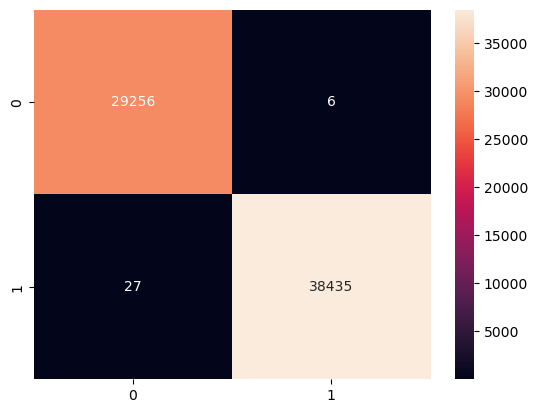

In [40]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

# Recursive Features Elimination

In [41]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=20, step=1)
rfe = rfe.fit(x_train, y_train)

In [42]:
print('Chosen best 20 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Destination_Port', 'Total_Fwd_Packets', 'Total_Length_of_Fwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Std', 'Fwd_Header_Length',
       'Packet_Length_Mean', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size',
       'Avg_Bwd_Segment_Size', 'Fwd_Hea_er_Length_1', 'Subflow_Fwd_Packets',
       'Subflow_Fwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd'],
      dtype='object')


Accuracy is:  0.999822810229756


<AxesSubplot:>

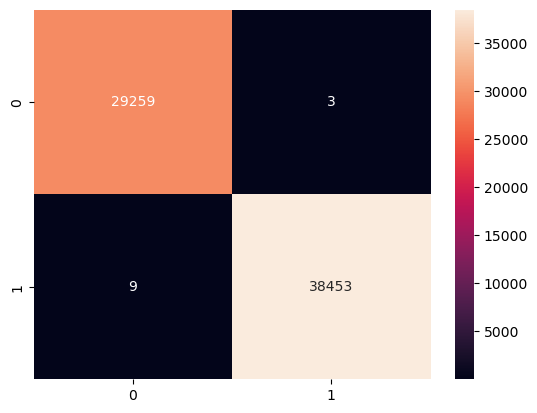

In [43]:
y_pred = rfe.predict(x_test)
ac_2 = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="d")

In [44]:
x_train.shape

(158021, 66)

# RFE with Cross Validation

In [45]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 30
Best features : Index(['Destination_Port', 'Total_Fwd_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Std',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets', 'Packet_Length_Mean',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size',
       'Avg_Bwd_Segment_Size', 'Fwd_Hea_er_Length_1', 'Subflow_Fwd_Packets',
       'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'act_data_pkt_fwd'],
      dtype='object')


Accuracy is:  0.999940936743252


<AxesSubplot:>

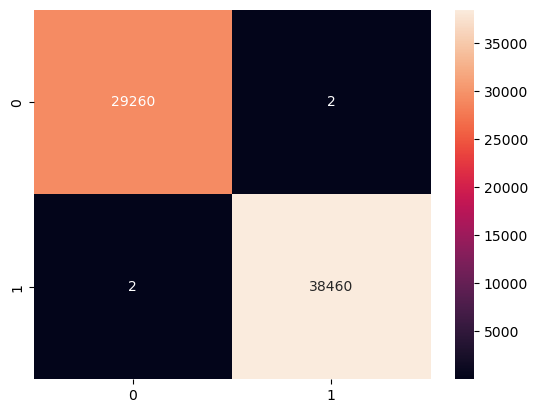

In [46]:
y_pred2 = rfecv.predict(x_test)
ac_2 = accuracy_score(y_test,y_pred2)
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm_2,annot=True,fmt="d")

Read Papers

Bot-Iot

Time Efficienty

Other Algorithms/improve algo

In [42]:
df_1 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df_2 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df_3 = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
df_4 = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
df_5 = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df_6 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df_7 = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
df_8 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')

In [43]:
frames=[df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
df_all=pd.concat(frames)

In [44]:
df_all.columns=columns

In [45]:
df_all.isnull().sum().any()

True

In [46]:
df_all.iloc[:,0:40].isna().sum()

Destination_Port                  0
Flow_Duration                     0
Total_Fwd_Packets                 0
Total_Backward_Packets            0
Total_Length_of_Fwd_Packets       0
Total_Length_of_Bwd_Packets       0
Fwd_Packet_Length_Max             0
Fwd_Packet_Length_Min             0
Fwd_Packet_Length_Mean            0
Fwd_Packet_Length_Std             0
Bwd_Packet_Length_Max             0
Bwd_Packet_Length_Min             0
Bwd_Packet_Length_Mean            0
Bwd_Packet_Length_Std             0
Flow_Bytes                     1358
Flow_Packets                      0
Flow_IAT_Mean                     0
Flow_IAT_Std                      0
Flow_IAT_Max                      0
Flow_IAT_Min                      0
Fwd_IAT_Total                     0
Fwd_IAT_Mean                      0
Fwd_IAT_Std                       0
Fwd_IAT_Max                       0
Fwd_IAT_Min                       0
Bwd_IAT_Total                     0
Bwd_IAT_Mean                      0
Bwd_IAT_Std                 

In [47]:
df_all.iloc[:,39:80].isna().sum()

Max_Packet_Length          0
Packet_Length_Mean         0
Packet_Length_Std          0
Packet_Length_Variance     0
FIN-Flag_Count             0
SYN_Flag_Count             0
RST_Flag_Count             0
PSH_Flag_Count             0
ACK_Flag_Count             0
URG_Flag_Count             0
CWE_Flag_Count             0
ECE_Flag_Count             0
Down/Up_Ratio              0
Average_Packet_Size        0
Avg_Fwd_Segment_Size       0
Avg_Bwd_Segment_Size       0
Fwd_Hea_er_Length_1        0
Fwd_Avg-Bytes/Bulk         0
Fwd_Avg_Packets/Bulk       0
Fwd_Avg_Bulk Rate          0
Bwd_Avg_Bytes/Bulk         0
Bwd_Avg_Packets/Bulk       0
Bwd_Avg_Bulk_Rate          0
Subflow_Fwd_Packets        0
Subflow_Fwd_Bytes          0
Subflow_Bwd_Packets        0
Subflow_Bwd_Bytes          0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
act_data_pkt_fwd           0
min_seg_size_forward       0
Active_Mean                0
Active_Std                 0
Active_Max                 0
Active_Min    

In [48]:
df_all = df_all.dropna(axis = 0, how ='any') 

In [49]:
df_all.shape

(2829385, 79)

In [50]:
df_all.isnull().sum().any()

False

In [51]:
df_all['Label'].value_counts()

BENIGN                        2272688
DoS Hulk                       230124
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64